In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Copy of Depression and Happiness Factor Analysis.csv')
data = data.drop(['Timestamp'], axis=1)
data.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
1,4th year,Normal,40,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
2,4th year,Bad,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
3,4th year,Normal,45,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
4,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,Yes,Family,Yes,No,Yes,No,No,7


In [3]:
data.shape

(704, 20)

In [4]:
## remove records containing null value
data = data.dropna(axis=0)

In [5]:
data.shape

(703, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 703
Data columns (total 20 columns):
Which year are you in?                                                                          703 non-null object
How are you feeling right now?                                                                  703 non-null object
On a scale of 1-100, how would you express this feeling?                                        703 non-null int64
Gender                                                                                          703 non-null object
Age                                                                                             703 non-null int64
Your location ?                                                                                 703 non-null object
Relationship status                                                                             703 non-null object
Are you happy with your financial state?                                             

## Data preprocessing

In [10]:
## Encoding for categorical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_updated = data.apply(LabelEncoder().fit_transform)
data_updated.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,0,2,49,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,4
1,0,2,39,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,4
2,0,0,49,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,4
3,0,2,44,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,4
4,0,2,49,0,0,2,0,1,3,2,1,1,1,0,0,1,2,0,0,4


In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

### Standardization

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_updated)

In [17]:
scaled_data

array([[ 0.        ,  0.04688998, -0.20544464, ..., -0.63056666,
        -0.99291274,  0.09815065],
       [ 0.        ,  0.04688998, -0.53654868, ..., -0.63056666,
        -0.99291274,  0.09815065],
       [ 0.        , -1.38631238, -0.20544464, ..., -0.63056666,
        -0.99291274,  0.09815065],
       ...,
       [ 0.        ,  1.48009233,  1.18519233, ..., -0.63056666,
        -0.99291274,  0.60926106],
       [ 0.        ,  1.48009233,  1.41696516, ..., -0.63056666,
         1.00713785,  1.63148189],
       [ 0.        , -0.6697112 ,  0.9865299 , ..., -0.63056666,
        -0.99291274,  0.60926106]])

### Dimensionality Reduction with PCA

In [18]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [20]:
#deciding how many features i would like to keep based on the cumulative variance plot.
pca.explained_variance_ratio_ 

array([2.73623418e-01, 8.11919273e-02, 7.51995333e-02, 7.37603375e-02,
       6.82829736e-02, 6.58058199e-02, 5.89708513e-02, 5.83434477e-02,
       5.43302634e-02, 4.68507577e-02, 4.48625650e-02, 4.23767744e-02,
       2.65563843e-02, 1.88443902e-02, 1.10005564e-02, 2.70275541e-33,
       5.42369376e-34, 8.28483926e-36, 1.90441217e-37, 0.00000000e+00])

Text(0, 0.5, 'Cumulative Explained Variance')

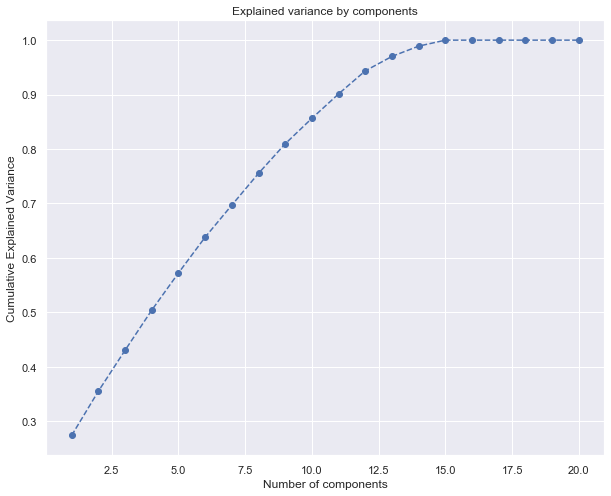

In [21]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained variance by components")
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

## perform PCA with chosen number of components

In [22]:
pca = PCA(n_components = 9)
pca.fit(scaled_data)

PCA(n_components=9)

In [23]:
pca.transform(scaled_data)

array([[-0.80309976,  0.11015862, -1.71090001, ..., -0.00593996,
        -0.47134433, -0.63395977],
       [ 0.22281509,  0.20662144, -1.71150222, ...,  0.03812788,
        -0.59046317, -0.64902286],
       [ 0.31725863,  0.28108792, -1.97617664, ...,  0.54863358,
         0.08289266, -1.39739152],
       ...,
       [-2.74002837,  0.30340096, -0.8613949 , ..., -0.16894793,
        -0.50177607,  0.32342427],
       [-2.7671812 ,  0.42936921,  0.5116066 , ..., -1.45152575,
        -1.19825354,  0.44632923],
       [-2.15959044,  0.02831828, -1.3121549 , ...,  1.07921195,
         0.33356367,  0.19967536]])

In [24]:
score_pca = pca.transform(scaled_data)

## Chosing number of cluster using elbow method

In [32]:
#SSC is the sum of squared distance between each point and the centroid in a cluster
ssc = []

for k in range(1,15):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(score_pca)
  ssc_iter = kmeans.inertia_
  ssc.append(ssc_iter)

ssc

[8536.267892155407,
 6126.9803943593915,
 5553.658944363484,
 5167.102565918272,
 4901.250250004901,
 4709.2595985720445,
 4458.155501819887,
 4345.426605956115,
 4174.130227177754,
 4076.144281699695,
 3973.003863301594,
 3844.5592289215197,
 3765.221899871654,
 3667.9360224398342]

## Plotting SSC against the number of components

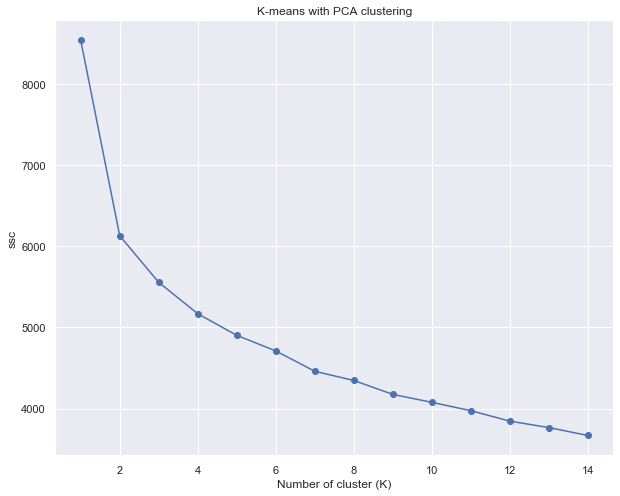

In [33]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15), ssc, marker = 'o', linestyle = '-')
plt.xlabel('Number of cluster (K)')
plt.ylabel('ssc')
plt.title('K-means with PCA clustering')
plt.show()

In [34]:
## choose numner of cluster 3
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca.fit(score_pca)

KMeans(n_clusters=3, random_state=42)

In [36]:
y_pred = kmeans_pca.fit_predict(score_pca)
y_pred

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1,
       0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1,
       2, 0, 0, 2, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2,
       0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0,
       0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 2,
       0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1,
       2, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1,
       2, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1,

## KMeans clustering with PCA result

In [45]:
df = pd.concat([data_updated.reset_index(drop = True), pd.DataFrame(score_pca)], axis = 1)
df.columns.values[-9: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Component 9']
df['Cluster'] = kmeans_pca.labels_

In [46]:
df.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,...,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Cluster
0,0,2,49,0,0,2,0,1,3,2,...,-0.803100,0.110159,-1.710900,0.058934,0.111693,1.434728,-0.005940,-0.471344,-0.633960,1
1,0,2,39,0,0,2,0,1,3,2,...,0.222815,0.206621,-1.711502,-0.017101,0.088423,1.527809,0.038128,-0.590463,-0.649023,2
2,0,0,49,0,0,2,0,1,3,2,...,0.317259,0.281088,-1.976177,0.341611,-0.518482,1.155191,0.548634,0.082893,-1.397392,2
3,0,2,44,0,0,2,0,1,3,2,...,-0.729503,0.118405,-1.714940,0.050583,0.111859,1.449284,-0.010461,-0.483328,-0.636132,1
4,0,2,49,0,0,2,0,1,3,2,...,-0.521137,0.852899,-1.563044,-0.095354,-0.063619,1.079573,-0.019036,-0.365716,-0.559966,1


In [47]:
df['cluster'] = df['Cluster'].map({0:'first', 1:'second', 2:'third'})

In [48]:
df.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,...,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Cluster,cluster
0,0,2,49,0,0,2,0,1,3,2,...,0.110159,-1.710900,0.058934,0.111693,1.434728,-0.005940,-0.471344,-0.633960,1,second
1,0,2,39,0,0,2,0,1,3,2,...,0.206621,-1.711502,-0.017101,0.088423,1.527809,0.038128,-0.590463,-0.649023,2,third
2,0,0,49,0,0,2,0,1,3,2,...,0.281088,-1.976177,0.341611,-0.518482,1.155191,0.548634,0.082893,-1.397392,2,third
3,0,2,44,0,0,2,0,1,3,2,...,0.118405,-1.714940,0.050583,0.111859,1.449284,-0.010461,-0.483328,-0.636132,1,second
4,0,2,49,0,0,2,0,1,3,2,...,0.852899,-1.563044,-0.095354,-0.063619,1.079573,-0.019036,-0.365716,-0.559966,1,second


## Visualization

/home/simanto/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


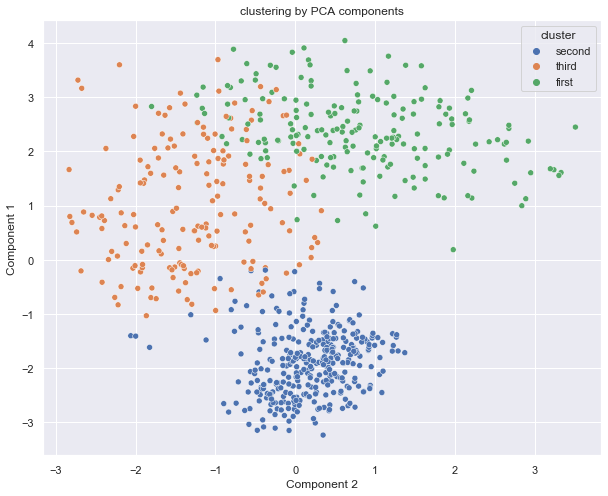

In [53]:
## for component 1 and 2
x_axis = df['Component 2']
y_axis = df['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df['cluster'])
plt.title('Clustering by PCA components')
plt.show()

/home/simanto/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


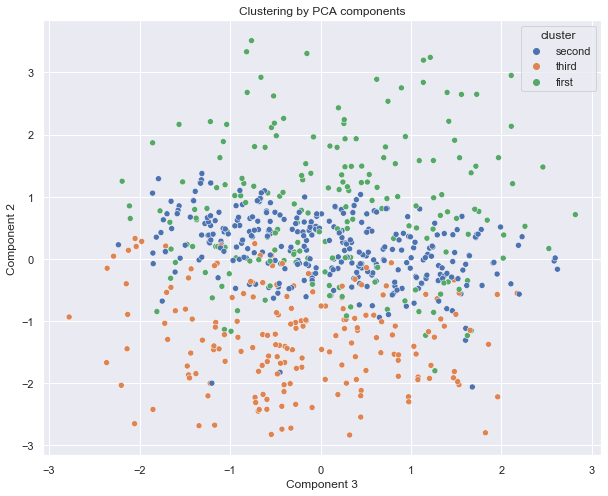

In [60]:
# for component 3 & 2
x_axis = df['Component 3']
y_axis = df['Component 2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df['cluster'])
plt.title('Clustering by PCA components')
plt.show()

/home/simanto/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


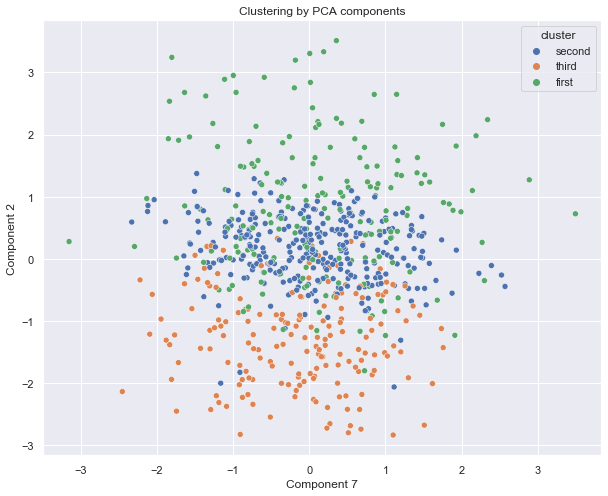

In [64]:

x_axis = df['Component 7']
y_axis = df['Component 2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df['cluster'])
plt.title('Clustering by PCA components')
plt.show()

/home/simanto/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


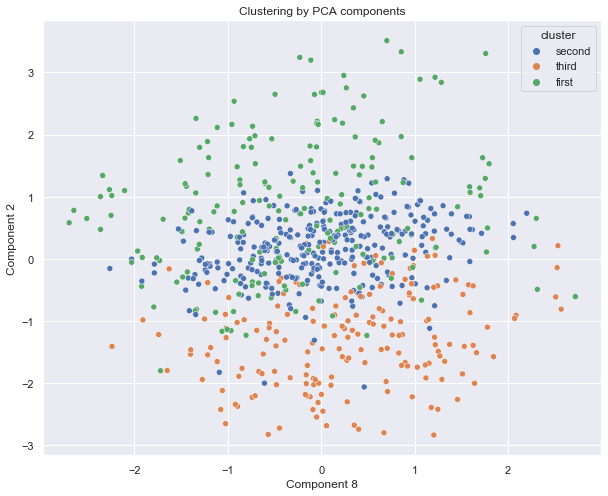

In [65]:

x_axis = df['Component 8']
y_axis = df['Component 2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df['cluster'])
plt.title('Clustering by PCA components')
plt.show()